Our aim is to build a machine learning model that can predict the price of the house given some information (like - State name, no. of BHK, square feet ) about it. So our Task is to build a regression model : 

**Import Libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

**Load Data**

In [3]:
data = pd.read_csv("archive/train.csv")


Let's look our data and check some statistics


In [4]:
data

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29446     Owner                   0     0        3       BHK  2500.000000   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE                            ADDRESS  LONGITUDE  \
0                  1       1              Ksfc Layout,Bangalore  12.969910   
1                  1       1          Vishweshwara Nagar,Mysore  12.274538   
2                  1       1                   Jigani,Bangalore  12.778033   
3                  1       1        Sector-1 Vaishali,Ghaziabad  28.642300   
4                  0       1                   New Town,Kolkata  22.592200   
...              ...     ...                                ...        ...   
29446              1       1               Shamshabad Road,Agra  27.140626   
29447              1       1  E3-108, Lake View Recidency,,Vapi  39.945409   
29448              1       1                  Ajmer Road,Jaipur  26.928785   
29449              1       1             Sholinganallur,Chennai  12.900150   
29450              1       1                   Jagatpura,Jaipur  26.832353   

        LATITUDE  TARGET(PRICE_IN_LACS)  
0      77.597960                   55.0  
1      76.644605                   51.0  
2      77.632191                   43.0  
3      77.344500                   62.5  
4      88.484911                   60.5  
...          ...                    ...  
29446  78.043277                   45.0  
29447 -86.150721                   16.0  
29448  75.828002                   27.1  
29449  80.227910                   67.0  
29450  75.841749                   27.8  

[29451 rows x 12 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
data.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
data.describe()

UNDER_CONSTRUCTION          RERA       BHK_NO.     SQUARE_FT  \
count        29451.000000  29451.000000  29451.000000  2.945100e+04   
mean             0.179756      0.317918      2.392279  1.980217e+04   
std              0.383991      0.465675      0.879091  1.901335e+06   
min              0.000000      0.000000      1.000000  3.000000e+00   
25%              0.000000      0.000000      2.000000  9.000211e+02   
50%              0.000000      0.000000      2.000000  1.175057e+03   
75%              0.000000      1.000000      3.000000  1.550688e+03   
max              1.000000      1.000000     20.000000  2.545455e+08   

       READY_TO_MOVE        RESALE     LONGITUDE      LATITUDE  \
count   29451.000000  29451.000000  29451.000000  29451.000000   
mean        0.820244      0.929578     21.300255     76.837695   
std         0.383991      0.255861      6.205306     10.557747   
min         0.000000      0.000000    -37.713008   -121.761248   
25%         1.000000      1.000000     18.452663     73.798100   
50%         1.000000      1.000000     20.750000     77.324137   
75%         1.000000      1.000000     26.900926     77.828740   
max         1.000000      1.000000     59.912884    152.962676   

       TARGET(PRICE_IN_LACS)  
count           29451.000000  
mean              142.898746  
std               656.880713  
min                 0.250000  
25%                38.000000  
50%                62.000000  
75%               100.000000  
max             30000.000000



**Data Cleaning**



Let's begin with cleaning data.
Let's extract cities from address so that we can get a string

In [8]:
data["ADDRESS"]= data["ADDRESS"].str.split(",").str[-1]
data.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE    ADDRESS  LONGITUDE   LATITUDE  \
0              1       1  Bangalore  12.969910  77.597960   
1              1       1     Mysore  12.274538  76.644605   
2              1       1  Bangalore  12.778033  77.632191   
3              1       1  Ghaziabad  28.642300  77.344500   
4              0       1    Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51.0  
2                   43.0  
3                   62.5  
4                   60.5

In [9]:
print(data['ADDRESS'].unique())

['Bangalore' 'Mysore' 'Ghaziabad' 'Kolkata' 'Kochi' 'Jaipur' 'Mohali'
 'Chennai' 'Siliguri' 'Noida' 'Raigad' 'Bhubaneswar' 'Wardha' 'Pune'
 'Mumbai' 'Nagpur' 'Deoghar' 'Bhiwadi' 'Faridabad' 'Lalitpur'
 'Maharashtra' 'Vadodara' 'Visakhapatnam' 'Vapi' 'Mangalore' 'Aurangabad'
 'Ottapalam' 'Vijayawada' 'Belgaum' 'Bhopal' 'Lucknow' 'Kanpur'
 'Gandhinagar' 'Pondicherry' 'Agra' 'Ranchi' 'Gurgaon' 'Udupi' 'Indore'
 'Jodhpur' 'Coimbatore' 'Valsad' 'Palghar' 'Surat' 'Varanasi' 'Guwahati'
 'Amravati' 'Anand' 'Tirupati' 'Secunderabad' 'Raipur' 'Vizianagaram'
 'Thrissur' 'Satna' 'Madurai' 'Chandigarh' 'Shimla' 'Gwalior' 'Rajkot'
 'Sonipat' 'Allahabad' 'Berhampur' 'Roorkee' 'Dharuhera' 'Latur'
 'Durgapur' 'Panchkula' 'Solapur' 'Durg' 'Goa' 'Jamshedpur' 'Hazaribagh'
 'Jabalpur' 'Hosur' 'Morbi' 'Hubli' 'Karnal' 'Patna' 'Bilaspur'
 'Ratnagiri' 'Meerut' 'Kotdwara' 'Jalandhar' 'Amritsar' 'Patiala'
 'Ludhiana' 'Alwar' 'Kota' 'Panaji' 'Kolhapur' 'Ernakulam' 'Bhavnagar'
 'Bharuch' 'Asansol' 'Jhansi' 'Marga

**Feature Engineering**

add a column State for furthur data preprocessing

In [10]:
def map_state(city):
    if city in ['Raichur','Dharwad','Bangalore', 'Mysore', 'Mangalore', 'Udupi', 'Hubli', 'Belgaum','Bangalore', 'Mysore', 'Mangalore', 'Udupi', 'Belgaum', 'Hubli', 'Hassan', 'Gulbarga', 'Karwar']:
        return 'karnataka'
    elif city in ['Faizabad','Hapur','Amroha','Varanasi','Ghaziabad', 'Noida', 'Lalitpur', 'Lucknow', 'Kanpur', 'Agra', 'Allahabad', 'Meerut', 'Moradabad', 'Jhansi', 'Aligarh', 'Barabanki', 'Mathura', 'Hathras', 'Bareilly']:
        return 'Uttar Pradesh'
    elif city in ['Kharagpur','Durgapur','Kolkata', 'Darjeeling', 'Asansol', 'Siliguri', 'Midnapore', 'Bardhaman', 'Haldia', 'Siliguri', 'Asansol', 'Bardhaman', 'Midnapore', 'Darjeeling', 'Bankura']:
        return 'West Bengal'
    elif city in ['Malappuram','Kochi', 'Ottapalam', 'Thrissur', 'Palakkad', 'Kannur', 'Kottayam', 'Ernakulam', 'Kollam', 'Ooty', 'Pathanamthitta', 'Idukki']:
        return 'Kerala'
    elif city in ['Bharatpur','Neemrana','Udaipur','Jaipur', 'Jodhpur', 'Alwar', 'Kota', 'Ajmer', 'Jhunjhunu', 'Bikaner', 'Nagaur', 'Pali', 'Sikar', 'Banswara']:
        return 'Rajasthan'
    elif city in ['Rajpura','Mohali', 'Jalandhar', 'Amritsar', 'Patiala', 'Ludhiana', 'Gurdaspur', 'Hoshiarpur', 'Phagwara']:
        return 'Punjab'
    elif city in ['Nagapattinam','Thanjavur','Coimbatore', 'Salem', 'Erode', 'Tirunelveli', 'Vellore', 'Cuddalore', 'Ooty', 'Kanchipuram', 'Karur', 'Thoothukudi', 'Karaikudi', 'Pudukkottai','Chennai', 'Coimbatore', 'Madurai', 'Hosur', 'Salem', 'Erode', 'Pudukkottai', 'Thoothukudi', 'Karaikudi']:
        return 'Tamil Nadu'
    elif city in ['Faridabad', 'Gurgaon', 'Noida']:
        return 'Delhi NCR'
    elif city in ['Karjat','Sindhudurg','Latur' ,'Karad','Maharashtra','Raigad', 'Wardha', 'Pune', 'Mumbai', 'Nagpur', 'Aurangabad', 'Palghar', 'Amravati', 'Jalgaon', 'Solapur', 'Ratnagiri', 'Kolhapur', 'Ahmednagar', 'Jalna', 'Akola', 'Bhandara', 'Chandrapur', 'Osmanabad', 'Yavatmal', 'Gondia', 'Washim', 'Beed', 'Shirdi', 'Nanded', 'Gadhinglaj']:
        return 'Maharashtra'
    elif city in ['Jajpur','Angul','Bhadrak','Puri','Rourkela','Bhubaneswar', 'Berhampur', 'Cuttack', 'Rayagada', 'Balasore', 'Sambalpur', 'Jharsuguda']:
        return 'Odisha'
    elif city in  ['Deoghar', 'Ranchi', 'Jamshedpur', 'Hazaribagh', 'Dhanbad', 'Bokaro']:
        return 'Jharkhand'
    elif city in ['Kurukshetra','Dharuhera','Gurgaon', 'Faridabad', 'Rohtak', 'Sonipat', 'Panchkula', 'Panipat','Bhiwadi', 'Faridabad', 'Gurgaon', 'Sonipat', 'Bahadurgarh', 'Panipat', 'Jind', 'Ambala', 'Karnal', 'Rohtak', 'Bhiwani', 'Rewari', 'Palwal']:
        return 'Haryana'
    elif city in   ['Kadi','Porbandar','Jamnagar','Rajkot','Vadodara', 'Vapi', 'Gandhinagar', 'Valsad', 'Surat', 'Anand', 'Navsari', 'Dhule', 'Bhavnagar', 'Bharuch', 'Morbi', 'Gandhidham', 'Junagadh', 'Ahmednagar', 'Nadiad', 'Sabarkantha', 'Godhra', 'Surendranagar', 'Visnagar', 'Bhuj']:
        return 'Gujrat'
    elif city in   ['Chittoor','Dahod','Palanpur','Kurnool','Bhimavaram','Visakhapatnam', 'Vijayawada', 'Guntur', 'Tirupati', 'Secunderabad', 'Vizianagaram', 'Anantapur', 'Eluru', 'Nellore', 'Tenali', 'Ongole', 'Srikakulam', 'Kadapa', 'Kakinada', 'Machilipatnam', 'Guntur']:
        return 'Andhra Pradesh'
    elif city in  ['Durg','Bhilai','Raipur', 'Bilaspur', 'Korba', 'Raigarh', 'Jagdalpur', 'Rajnandgaon']:
        return 'ChattishGarh'
    elif city in  ['Dehradun', 'Haridwar', 'Nainital', 'Roorkee', 'Rudrapur', 'Kotdwara', 'Haldwani', 'Rishikesh']:
        return 'Uttarakhand'
    elif city in  ['Panaji', 'Margao', 'Goa']:
        return 'Goa'
    elif city in['Gadarwara','Sagar','Harda','Bhopal', 'Indore', 'Jabalpur', 'Ujjain', 'Gwalior', 'Satna', 'Hoshangabad', 'Vidisha', 'Chhindwara', 'Rewa', 'Betul']:
        return 'Madhya Pradesh'
    elif city in ['Patna', 'Muzaffarpur', 'Hajipur', 'Darbhanga', 'Bhagalpur', 'Gaya', 'Arrah', 'Siwan']:
        return 'Bihar'
    elif city in ['Baddi','Kangra','Shimla', 'Solan', 'Dalhousie', 'Raisen']:
        return 'Himachal Pradesh'
    elif city in ['Agartala'] :
        return 'Tripura'
    elif city in ['Guwahati', 'Dibrugarh', 'Silchar', 'Nagaon']:
        return 'Assam'
    #elif city in []:
    elif city in  ['Nizamabad','Warangal', 'Hyderabad', 'Karimnagar', 'Siddipet']:
        return 'Telengana'
    elif city in ['Jammu', 'Srinagar']:
        return 'Jammu N Kashmir'
    elif city in ['Imphal']:
        return 'Manipur'
    elif city in ['Shillong']:
        return 'Meghalaya'
    elif city in ['Kohima']:
        return 'Nagaland'
    elif city in ['Gangtok']:
        return 'Sikkim'
    elif city in ['Chandigarh','Pondicherry']:
        return 'Union Territory'
         
    
    

data['State'] = data['ADDRESS'].apply(map_state)

In [11]:
data

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29446     Owner                   0     0        3       BHK  2500.000000   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE    ADDRESS  LONGITUDE   LATITUDE  \
0                  1       1  Bangalore  12.969910  77.597960   
1                  1       1     Mysore  12.274538  76.644605   
2                  1       1  Bangalore  12.778033  77.632191   
3                  1       1  Ghaziabad  28.642300  77.344500   
4                  0       1    Kolkata  22.592200  88.484911   
...              ...     ...        ...        ...        ...   
29446              1       1       Agra  27.140626  78.043277   
29447              1       1       Vapi  39.945409 -86.150721   
29448              1       1     Jaipur  26.928785  75.828002   
29449              1       1    Chennai  12.900150  80.227910   
29450              1       1     Jaipur  26.832353  75.841749   

       TARGET(PRICE_IN_LACS)          State  
0                       55.0      karnataka  
1                       51.0      karnataka  
2                       43.0      karnataka  
3                       62.5  Uttar Pradesh  
4                       60.5    West Bengal  
...                      ...            ...  
29446                   45.0  Uttar Pradesh  
29447                   16.0         Gujrat  
29448                   27.1      Rajasthan  
29449                   67.0     Tamil Nadu  
29450                   27.8      Rajasthan  

[29451 rows x 13 columns]

In [12]:
print(data['State'].unique())

['karnataka' 'Uttar Pradesh' 'West Bengal' 'Kerala' 'Rajasthan' 'Punjab'
 'Tamil Nadu' 'Maharashtra' 'Odisha' 'Jharkhand' 'Haryana' 'Delhi NCR'
 'Gujrat' 'Andhra Pradesh' 'Madhya Pradesh' 'Union Territory' 'Assam'
 'ChattishGarh' 'Himachal Pradesh' 'Uttarakhand' 'Goa' 'Bihar' 'Telengana'
 'Tripura' 'Jammu N Kashmir']


In [13]:
data[pd.isna(data['State'])]['ADDRESS']

Series([], Name: ADDRESS, dtype: object)

print(column_contribution_calculateion(data))

add a column city_tier for furthur data preprocessing

In [15]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Haldia','Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'


data['city_tier'] = data['ADDRESS'].apply(map_city)

In [16]:
data

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29446     Owner                   0     0        3       BHK  2500.000000   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE    ADDRESS  LONGITUDE   LATITUDE  \
0                  1       1  Bangalore  12.969910  77.597960   
1                  1       1     Mysore  12.274538  76.644605   
2                  1       1  Bangalore  12.778033  77.632191   
3                  1       1  Ghaziabad  28.642300  77.344500   
4                  0       1    Kolkata  22.592200  88.484911   
...              ...     ...        ...        ...        ...   
29446              1       1       Agra  27.140626  78.043277   
29447              1       1       Vapi  39.945409 -86.150721   
29448              1       1     Jaipur  26.928785  75.828002   
29449              1       1    Chennai  12.900150  80.227910   
29450              1       1     Jaipur  26.832353  75.841749   

       TARGET(PRICE_IN_LACS)          State city_tier  
0                       55.0      karnataka     tier1  
1                       51.0      karnataka     tier2  
2                       43.0      karnataka     tier1  
3                       62.5  Uttar Pradesh     tier2  
4                       60.5    West Bengal     tier1  
...                      ...            ...       ...  
29446                   45.0  Uttar Pradesh     tier2  
29447                   16.0         Gujrat     tier3  
29448                   27.1      Rajasthan     tier2  
29449                   67.0     Tamil Nadu     tier1  
29450                   27.8      Rajasthan     tier2  

[29451 rows x 14 columns]

**Data Visualization**

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64


<BarContainer object of 2 artists>

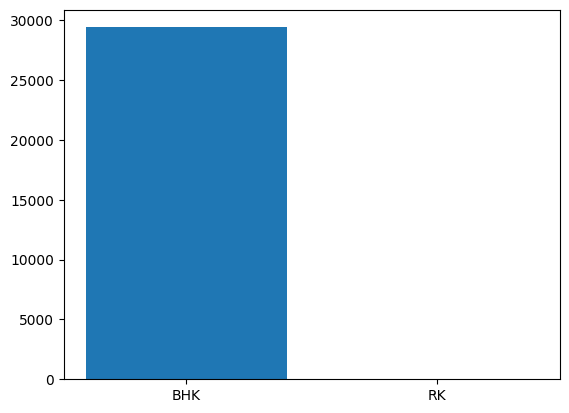

In [17]:
print(data["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],data["BHK_OR_RK"].value_counts())

most of the flats are of type BHK

READY_TO_MOVE
1    24157
0     5294
Name: count, dtype: int64


<BarContainer object of 2 artists>

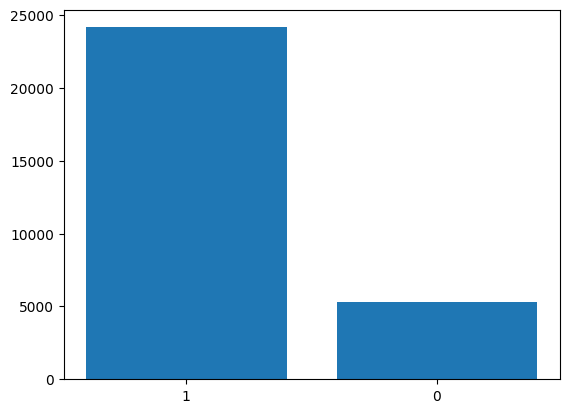

In [21]:
print(data["READY_TO_MOVE"].value_counts())
plt.bar(["1","0"],data["READY_TO_MOVE"].value_counts())

RESALE
1    27377
0     2074
Name: count, dtype: int64


<BarContainer object of 2 artists>

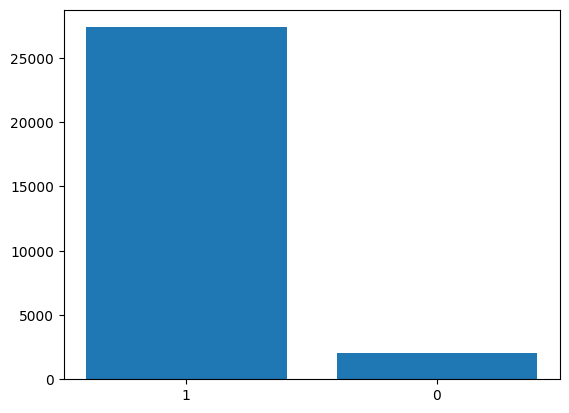

In [20]:
print(data["RESALE"].value_counts())
plt.bar(["1","0"],data["RESALE"].value_counts())

In [22]:
data["LONGITUDE"],data["LATITUDE"]=data["LATITUDE"],data["LONGITUDE"]
data.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE    ADDRESS  LONGITUDE   LATITUDE  \
0              1       1  Bangalore  77.597960  12.969910   
1              1       1     Mysore  76.644605  12.274538   
2              1       1  Bangalore  77.632191  12.778033   
3              1       1  Ghaziabad  77.344500  28.642300   
4              0       1    Kolkata  88.484911  22.592200   

   TARGET(PRICE_IN_LACS)          State city_tier  
0                   55.0      karnataka     tier1  
1                   51.0      karnataka     tier2  
2                   43.0      karnataka     tier1  
3                   62.5  Uttar Pradesh     tier2  
4                   60.5    West Bengal     tier1

In [23]:
data=data[data["LONGITUDE"].between(68,97) & data["LATITUDE"].between(8,37)]

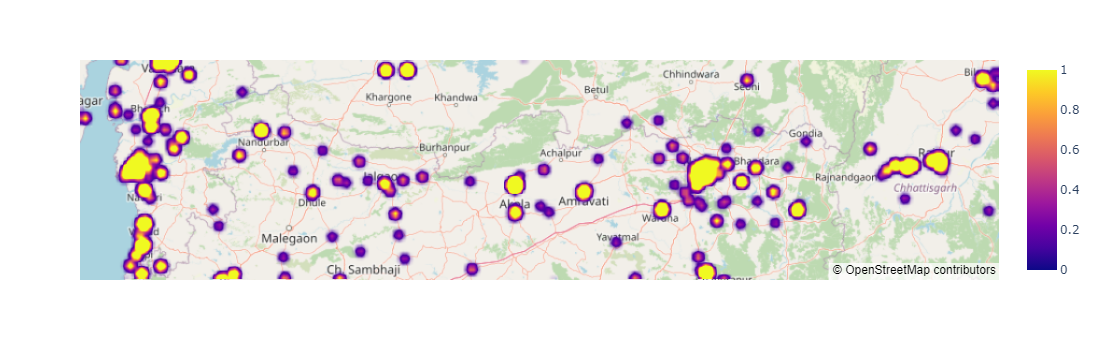

In [24]:
fig = px.density_mapbox(data,  lon = 'LONGITUDE',lat = 'LATITUDE',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29193 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29193 non-null  object 
 1   UNDER_CONSTRUCTION     29193 non-null  int64  
 2   RERA                   29193 non-null  int64  
 3   BHK_NO.                29193 non-null  int64  
 4   BHK_OR_RK              29193 non-null  object 
 5   SQUARE_FT              29193 non-null  float64
 6   READY_TO_MOVE          29193 non-null  int64  
 7   RESALE                 29193 non-null  int64  
 8   ADDRESS                29193 non-null  object 
 9   LONGITUDE              29193 non-null  float64
 10  LATITUDE               29193 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29193 non-null  float64
 12  State                  29193 non-null  object 
 13  city_tier              29193 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 3.3+ MB


<BarContainer object of 3 artists>

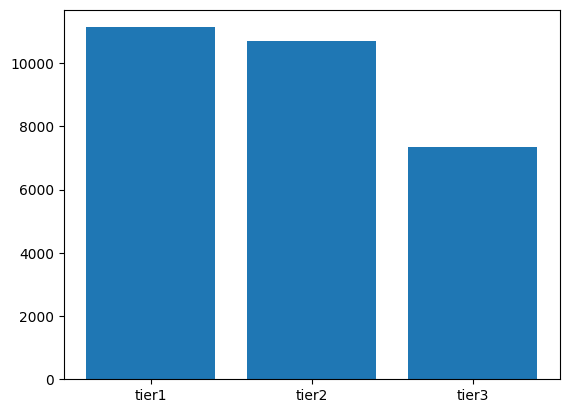

In [25]:
data['city_tier'].value_counts()
plt.bar(["tier1","tier2","tier3"],data["city_tier"].value_counts())

UNDER_CONSTRUCTION
0    23921
1     5272
Name: count, dtype: int64


<BarContainer object of 2 artists>

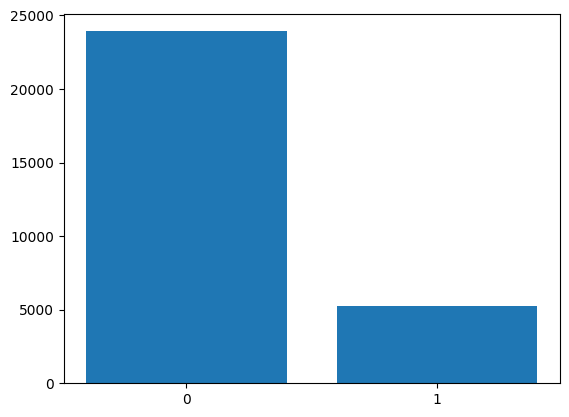

In [26]:
print(data['UNDER_CONSTRUCTION'].value_counts())
plt.bar(["0","1"],data["UNDER_CONSTRUCTION"].value_counts())

In [27]:
data['State'].value_counts()

State
Uttar Pradesh       6553
Maharashtra         6425
karnataka           4480
West Bengal         1885
Gujrat              1469
Tamil Nadu          1461
Rajasthan           1141
Delhi NCR           1079
Union Territory      713
Punjab               644
Madhya Pradesh       611
Haryana              515
Andhra Pradesh       509
Kerala               376
Odisha               268
Jharkhand            252
Uttarakhand          209
Goa                  186
ChattishGarh         167
Bihar                102
Assam                 92
Himachal Pradesh      43
Telengana              6
Jammu N Kashmir        6
Tripura                1
Name: count, dtype: int64

RERA
0    19858
1     9335
Name: count, dtype: int64


<BarContainer object of 2 artists>

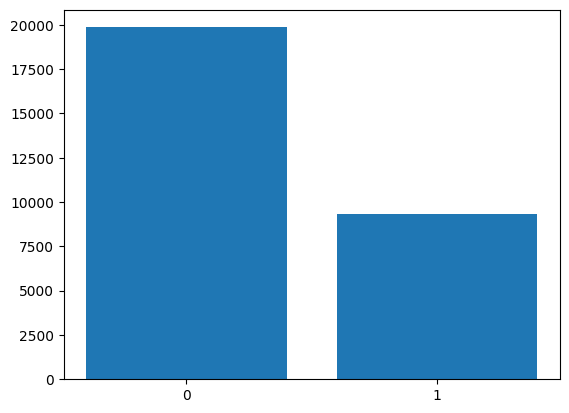

In [28]:
print(data['RERA'].value_counts())
plt.bar(["0","1"],data["RERA"].value_counts())

In [30]:
print(data['BHK_NO.'].value_counts())


BHK_NO.
2     13207
3     10442
1      3553
4      1708
5       189
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64


In [40]:

data['SQUARE_FT'].value_counts()


SQUARE_FT
1000.000000    476
1250.000000    289
800.000000     202
1200.000000    176
1600.000000    122
              ... 
1635.198921      1
1655.115341      1
2102.631579      1
620.113238       1
896.774194       1
Name: count, Length: 19402, dtype: int64

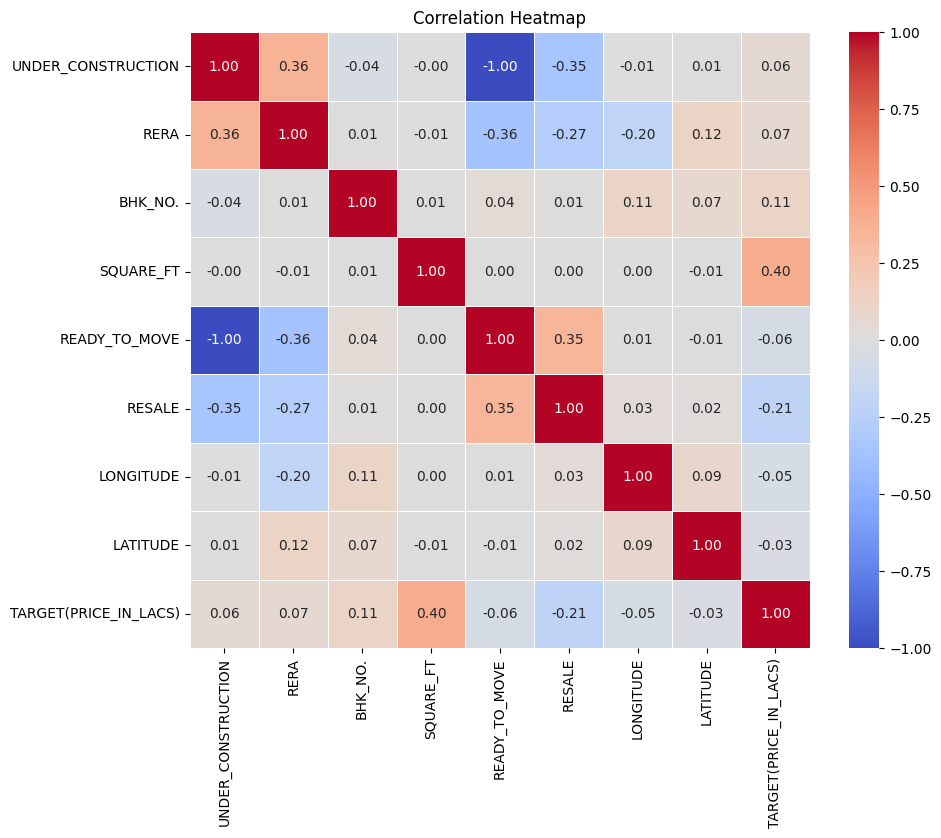

In [35]:
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Removing Outliers**

In [37]:
def column_contribution_calculateion(dff):
    df = pd.DataFrame(dff)

    # Ensure all columns are numeric
    df = df.apply(pd.to_numeric, errors='coerce')

    # Calculate the total sum of all columns
    total_sum = df.sum().sum()

    # Calculate percentage contribution for each column
    column_sums = df.sum()
    percentage_contribution = (column_sums / total_sum) * 100
    return (percentage_contribution)

print(column_contribution_calculateion(numeric_data))


UNDER_CONSTRUCTION        0.000894
RERA                      0.001582
BHK_NO.                   0.011834
SQUARE_FT                98.781007
READY_TO_MOVE             0.004054
RESALE                    0.004598
LONGITUDE                 0.382307
LATITUDE                  0.104688
TARGET(PRICE_IN_LACS)     0.709037
dtype: float64


In [38]:
# Filter out rows where BHK_NO. count is less than 10
data = data.groupby('BHK_NO.').filter(lambda x: len(x) >= 10)

# Print filtered value counts
print("\nFiltered value counts:")
print(data['BHK_NO.'].value_counts())


Filtered value counts:
BHK_NO.
2    13207
3    10442
1     3553
4     1708
5      189
6       52
7       11
8       10
Name: count, dtype: int64


In [41]:
data

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29445     Owner                   0     0        2       BHK  1062.134891   
29446     Owner                   0     0        3       BHK  2500.000000   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE    ADDRESS  LONGITUDE   LATITUDE  \
0                  1       1  Bangalore  77.597960  12.969910   
1                  1       1     Mysore  76.644605  12.274538   
2                  1       1  Bangalore  77.632191  12.778033   
3                  1       1  Ghaziabad  77.344500  28.642300   
4                  0       1    Kolkata  88.484911  22.592200   
...              ...     ...        ...        ...        ...   
29445              1       1    Belgaum  74.500000  15.866670   
29446              1       1       Agra  78.043277  27.140626   
29448              1       1     Jaipur  75.828002  26.928785   
29449              1       1    Chennai  80.227910  12.900150   
29450              1       1     Jaipur  75.841749  26.832353   

       TARGET(PRICE_IN_LACS)          State city_tier  
0                       55.0      karnataka     tier1  
1                       51.0      karnataka     tier2  
2                       43.0      karnataka     tier1  
3                       62.5  Uttar Pradesh     tier2  
4                       60.5    West Bengal     tier1  
...                      ...            ...       ...  
29445                   40.0      karnataka     tier2  
29446                   45.0  Uttar Pradesh     tier2  
29448                   27.1      Rajasthan     tier2  
29449                   67.0     Tamil Nadu     tier1  
29450                   27.8      Rajasthan     tier2  

[29172 rows x 14 columns]

adding another column price_per_sqft for preprocessing the data

In [42]:
data.loc[:, 'price_per_sqft'] = data['TARGET(PRICE_IN_LACS)'] / data['SQUARE_FT']

In [43]:
data

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29445     Owner                   0     0        2       BHK  1062.134891   
29446     Owner                   0     0        3       BHK  2500.000000   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE    ADDRESS  LONGITUDE   LATITUDE  \
0                  1       1  Bangalore  77.597960  12.969910   
1                  1       1     Mysore  76.644605  12.274538   
2                  1       1  Bangalore  77.632191  12.778033   
3                  1       1  Ghaziabad  77.344500  28.642300   
4                  0       1    Kolkata  88.484911  22.592200   
...              ...     ...        ...        ...        ...   
29445              1       1    Belgaum  74.500000  15.866670   
29446              1       1       Agra  78.043277  27.140626   
29448              1       1     Jaipur  75.828002  26.928785   
29449              1       1    Chennai  80.227910  12.900150   
29450              1       1     Jaipur  75.841749  26.832353   

       TARGET(PRICE_IN_LACS)          State city_tier  price_per_sqft  
0                       55.0      karnataka     tier1         0.04230  
1                       51.0      karnataka     tier2         0.04000  
2                       43.0      karnataka     tier1         0.04608  
3                       62.5  Uttar Pradesh     tier2         0.06721  
4                       60.5    West Bengal     tier1         0.06056  
...                      ...            ...       ...             ...  
29445                   40.0      karnataka     tier2         0.03766  
29446                   45.0  Uttar Pradesh     tier2         0.01800  
29448                   27.1      Rajasthan     tier2         0.02650  
29449                   67.0     Tamil Nadu     tier1         0.07227  
29450                   27.8      Rajasthan     tier2         0.03100  

[29172 rows x 15 columns]

In [44]:
data['price_per_sqft'].describe()

count    29172.000000
mean         0.075108
std          0.108798
min          0.000010
25%          0.035480
50%          0.050960
75%          0.080710
max          9.000000
Name: price_per_sqft, dtype: float64

In [45]:
data.describe()

UNDER_CONSTRUCTION          RERA       BHK_NO.     SQUARE_FT  \
count        29172.000000  29172.000000  29172.000000  2.917200e+04   
mean             0.180618      0.319999      2.383758  1.997311e+04   
std              0.384708      0.466484      0.821759  1.910405e+06   
min              0.000000      0.000000      1.000000  3.000000e+00   
25%              0.000000      0.000000      2.000000  9.000000e+02   
50%              0.000000      0.000000      2.000000  1.173283e+03   
75%              0.000000      1.000000      3.000000  1.550169e+03   
max              1.000000      1.000000      8.000000  2.545455e+08   

       READY_TO_MOVE        RESALE     LONGITUDE      LATITUDE  \
count   29172.000000  29172.000000  29172.000000  29172.000000   
mean        0.819382      0.929213     77.267989     21.161615   
std         0.384708      0.256473      4.147265      5.863088   
min         0.000000      0.000000     69.104114      8.513294   
25%         1.000000      1.000000     73.808940     18.448175   
50%         1.000000      1.000000     77.326457     20.461950   
75%         1.000000      1.000000     77.786000     26.862600   
max         1.000000      1.000000     95.000000     34.552275   

       TARGET(PRICE_IN_LACS)  price_per_sqft  
count           29172.000000    29172.000000  
mean              143.139240        0.075108  
std               659.801273        0.108798  
min                 0.250000        0.000010  
25%                38.000000        0.035480  
50%                61.800000        0.050960  
75%               100.000000        0.080710  
max             30000.000000        9.000000

In [46]:
data.rename(columns={'BHK_NO.': 'BHK'}, inplace=True)
data.rename(columns={'TARGET(PRICE_IN_LACS)': 'Target'}, inplace=True)
data

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0    2       BHK  1300.236407   
1        Dealer                   0     0    2       BHK  1275.000000   
2         Owner                   0     0    2       BHK   933.159722   
3         Owner                   0     1    2       BHK   929.921143   
4        Dealer                   1     0    2       BHK   999.009247   
...         ...                 ...   ...  ...       ...          ...   
29445     Owner                   0     0    2       BHK  1062.134891   
29446     Owner                   0     0    3       BHK  2500.000000   
29448    Dealer                   0     0    2       BHK  1022.641509   
29449     Owner                   0     0    2       BHK   927.079009   
29450    Dealer                   0     1    2       BHK   896.774194   

       READY_TO_MOVE  RESALE    ADDRESS  LONGITUDE   LATITUDE  Target  \
0                  1       1  Bangalore  77.597960  12.969910    55.0   
1                  1       1     Mysore  76.644605  12.274538    51.0   
2                  1       1  Bangalore  77.632191  12.778033    43.0   
3                  1       1  Ghaziabad  77.344500  28.642300    62.5   
4                  0       1    Kolkata  88.484911  22.592200    60.5   
...              ...     ...        ...        ...        ...     ...   
29445              1       1    Belgaum  74.500000  15.866670    40.0   
29446              1       1       Agra  78.043277  27.140626    45.0   
29448              1       1     Jaipur  75.828002  26.928785    27.1   
29449              1       1    Chennai  80.227910  12.900150    67.0   
29450              1       1     Jaipur  75.841749  26.832353    27.8   

               State city_tier  price_per_sqft  
0          karnataka     tier1         0.04230  
1          karnataka     tier2         0.04000  
2          karnataka     tier1         0.04608  
3      Uttar Pradesh     tier2         0.06721  
4        West Bengal     tier1         0.06056  
...              ...       ...             ...  
29445      karnataka     tier2         0.03766  
29446  Uttar Pradesh     tier2         0.01800  
29448      Rajasthan     tier2         0.02650  
29449     Tamil Nadu     tier1         0.07227  
29450      Rajasthan     tier2         0.03100  

[29172 rows x 15 columns]

In [47]:
(data['SQUARE_FT']/data['BHK']).describe()

count    2.917200e+04
mean     7.267847e+03
std      6.606675e+05
min      1.500000e+00
25%      4.500212e+02
50%      5.312149e+02
75%      6.125151e+02
max      8.484848e+07
dtype: float64

In [48]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,  subdf in df.groupby('city_tier'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft < (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index = True)

    return df_output

data = remove_outliers_sqft(data)
data.describe()

UNDER_CONSTRUCTION          RERA           BHK      SQUARE_FT  \
count        27406.000000  27406.000000  27406.000000   27406.000000   
mean             0.175181      0.311830      2.366745    1919.541621   
std              0.380128      0.463249      0.803042   11438.324136   
min              0.000000      0.000000      1.000000      90.252708   
25%              0.000000      0.000000      2.000000     900.163666   
50%              0.000000      0.000000      2.000000    1174.056342   
75%              0.000000      1.000000      3.000000    1543.421828   
max              1.000000      1.000000      8.000000  875000.000000   

       READY_TO_MOVE        RESALE     LONGITUDE      LATITUDE        Target  \
count   27406.000000  27406.000000  27406.000000  27406.000000  27406.000000   
mean        0.824819      0.932679     77.468724     21.252785    117.811783   
std         0.380128      0.250582      4.136762      5.983274    573.850931   
min         0.000000      0.000000     69.104114      8.513294      0.250000   
25%         1.000000      1.000000     73.941670     17.731017     36.000000   
50%         1.000000      1.000000     77.351104     21.147280     58.200000   
75%         1.000000      1.000000     78.068793     26.906061     95.000000   
max         1.000000      1.000000     95.000000     34.091110   9990.000000   

       price_per_sqft  
count    27406.000000  
mean         0.060367  
std          0.038448  
min          0.000040  
25%          0.034822  
50%          0.048890  
75%          0.072867  
max          0.234180

In [49]:
def bhk_outliers_remover(df):
    ex_indices = np.array([])
    for loc,loc_df in df.groupby('city_tier'):
        bhk_stats = {}
        for bhk,bhk_df in loc_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }

        for bhk,bhk_df in loc_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count']>5:
                ex_indices = np.append(ex_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(ex_indices,axis='index')

data = remove_outliers_sqft(data)
data.describe()

UNDER_CONSTRUCTION          RERA           BHK      SQUARE_FT  \
count        20060.000000  20060.000000  20060.000000   20060.000000   
mean             0.172931      0.318445      2.350847    1746.091539   
std              0.378197      0.465885      0.775669    8494.281505   
min              0.000000      0.000000      1.000000     152.012648   
25%              0.000000      0.000000      2.000000     925.094048   
50%              0.000000      0.000000      2.000000    1179.889009   
75%              0.000000      1.000000      3.000000    1508.120650   
max              1.000000      1.000000      8.000000  246008.783300   

       READY_TO_MOVE        RESALE     LONGITUDE      LATITUDE        Target  \
count   20060.000000  20060.000000  20060.000000  20060.000000  20060.000000   
mean        0.827069      0.940578     77.503011     21.136410     96.565697   
std         0.378197      0.236418      3.927798      6.160595    501.782204   
min         0.000000      0.000000     69.104114      8.513294      6.000000   
25%         1.000000      1.000000     74.735239     15.450560     39.400000   
50%         1.000000      1.000000     77.367514     21.111835     56.600000   
75%         1.000000      1.000000     78.101696     26.916670     82.000000   
max         1.000000      1.000000     95.000000     34.091110   9790.000000   

       price_per_sqft  
count    20060.000000  
mean         0.053074  
std          0.022704  
min          0.023370  
25%          0.036910  
50%          0.047675  
75%          0.062690  
max          0.142960

In [50]:
data = remove_outliers_sqft(data)
data.describe()

UNDER_CONSTRUCTION          RERA           BHK      SQUARE_FT  \
count        12433.000000  12433.000000  12433.000000   12433.000000   
mean             0.182498      0.332824      2.343119    1765.286768   
std              0.386270      0.471243      0.764302    9175.771436   
min              0.000000      0.000000      1.000000     152.012648   
25%              0.000000      0.000000      2.000000     935.143288   
50%              0.000000      0.000000      2.000000    1180.134404   
75%              0.000000      1.000000      3.000000    1500.214316   
max              1.000000      1.000000      8.000000  246008.783300   

       READY_TO_MOVE        RESALE     LONGITUDE      LATITUDE        Target  \
count   12433.000000  12433.000000  12433.000000  12433.000000  12433.000000   
mean        0.817502      0.941848     77.548070     21.040364     91.119577   
std         0.386270      0.234039      3.861112      6.236699    491.669944   
min         0.000000      0.000000     69.104114      8.513294      8.000000   
25%         1.000000      1.000000     75.000000     13.650000     41.700000   
50%         1.000000      1.000000     77.369936     21.000000     57.000000   
75%         1.000000      1.000000     78.416000     26.900926     78.000000   
max         1.000000      1.000000     95.000000     32.537765   9700.000000   

       price_per_sqft  
count    12433.000000  
mean         0.051036  
std          0.016208  
min          0.029140  
25%          0.038130  
50%          0.047610  
75%          0.060600  
max          0.103280

In [51]:
numeric_data = data.select_dtypes(include=[np.number])
print(column_contribution_calculateion(numeric_data))

UNDER_CONSTRUCTION     0.009313
RERA                   0.016984
BHK                    0.119567
SQUARE_FT             90.081112
READY_TO_MOVE          0.041716
RESALE                 0.048062
LONGITUDE              3.957213
LATITUDE               1.073672
Target                 4.649756
price_per_sqft         0.002604
dtype: float64


We will drop other columns which have very low contribution .
We will also drop column LONGITUDE and LATITUDE as we do not want to use that in prediction as we only want to use State, BHK, SQUARE_FT. 


In [52]:
data.drop(columns=["price_per_sqft","LONGITUDE","LATITUDE","ADDRESS","POSTED_BY","BHK_OR_RK","UNDER_CONSTRUCTION","RERA","READY_TO_MOVE","RESALE","city_tier"],inplace=True)

In [53]:
data

BHK    SQUARE_FT  Target          State
0        2   933.159722    43.0      karnataka
1        2   999.009247    60.5    West Bengal
2        2   927.177902    48.0      karnataka
3        3  2178.649237   120.0      karnataka
4        2   881.143529    45.0     Tamil Nadu
...    ...          ...     ...            ...
12428    3  1563.155686    74.5         Punjab
12429    5  2249.913465   130.0         Kerala
12430    2  1350.007105    95.0  Uttar Pradesh
12431    2   999.070632    86.0  Uttar Pradesh
12432    2  1265.094882   110.0  Uttar Pradesh

[12433 rows x 4 columns]

In [54]:
numeric_data = data.select_dtypes(include=[np.number])
print(column_contribution_calculateion(numeric_data))

BHK           0.126059
SQUARE_FT    94.971743
Target        4.902198
dtype: float64


In [55]:
data.to_csv("Indian_Metropolitan_house_price_data.csv")

In [56]:
X=data.drop(columns=["Target"])
y=data['Target']

**Building Models & Predicting price**

let's import

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

Splitting data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9946, 3)
(9946,)
(2487, 3)
(2487,)


In [60]:
print(X_train)
print(X_test)

       BHK    SQUARE_FT            State
8138     3  1540.029112        Delhi NCR
4484     3  1600.000000       Tamil Nadu
2646     1   502.067336        karnataka
11899    1   719.957650      Maharashtra
11476    2   684.121622    Uttar Pradesh
...    ...          ...              ...
4859     4  2300.272075  Union Territory
3264     2  1116.990006        karnataka
9845     2  1094.890511           Punjab
10799    3  1622.405713    Uttar Pradesh
2732     2  1020.110755      Maharashtra

[9946 rows x 3 columns]
       BHK    SQUARE_FT          State
5019     2  1479.885057    Uttarakhand
10820    2  3350.515464            Goa
4324     2   700.084010    West Bengal
10897    1   636.007828  Uttar Pradesh
5334     3  1402.147971  Uttar Pradesh
...    ...          ...            ...
4041     2  1025.077796    Maharashtra
6604     2   850.228908  Uttar Pradesh
4647     3  1600.000000  Uttar Pradesh
10591    1   685.049548    Maharashtra
10919    1   599.212713  Uttar Pradesh

[2487 rows x 3

Encoding

In [61]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['State']),
    remainder='passthrough',force_int_remainder_cols=False
)

Scaling

In [62]:
scalar = StandardScaler(with_mean=False)

In [63]:
lr = LinearRegression()

In [64]:
pipe = make_pipeline(column_trans,scalar,lr)

In [65]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['State'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [66]:
Y_pred_lr = pipe.predict(X_test)

In [67]:
r2_score(y_test,Y_pred_lr)

0.9725767460625733

In [136]:
print(X)

       UNDER_CONSTRUCTION  RERA  BHK    SQUARE_FT  READY_TO_MOVE  RESALE  \
0                       0     0    2   933.159722              1       1   
1                       1     0    2   999.009247              0       1   
2                       0     0    2   927.177902              1       1   
3                       0     1    3  2178.649237              1       1   
4                       0     0    2   881.143529              1       1   
...                   ...   ...  ...          ...            ...     ...   
12428                   1     1    3  1563.155686              0       1   
12429                   0     0    5  2249.913465              1       1   
12430                   0     1    2  1350.007105              1       1   
12431                   0     1    2   999.070632              1       1   
12432                   0     1    2  1265.094882              1       1   

               State city_tier  
0          karnataka     tier1  
1        West Bengal 

In [68]:
dtr = DecisionTreeRegressor()

In [69]:
pipe = make_pipeline(column_trans,scalar,dtr)

In [70]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['State'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [71]:
Y_pred_dtr = pipe.predict(X_test)

In [72]:
r2_score(y_test,Y_pred_dtr)

0.9872315827469533

In [73]:
rfr = RandomForestRegressor()

In [74]:
pipe = make_pipeline(column_trans,scalar,rfr)

In [75]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['State'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [76]:
Y_pred_rfr = pipe.predict(X_test)

In [77]:
r2_score(y_test,Y_pred_rfr)

0.9889842783784313

In [79]:
mse = mean_squared_error(y_test, Y_pred_rfr)
mae = mean_absolute_error(y_test, Y_pred_rfr)
print('mse: ', mse)
print('mae: ', mae)

mse:  2301.011767044949
mae:  12.727185401662938


In [80]:
print('No reg:',r2_score(y_test,Y_pred_lr))
print('DecisionTreeRegressor:',r2_score(y_test,Y_pred_dtr))
print('RandomForestRegressor:',r2_score(y_test,Y_pred_rfr))

No reg: 0.9725767460625733
DecisionTreeRegressor: 0.9872315827469533
RandomForestRegressor: 0.9889842783784313


In [81]:
import pickle

In [82]:
pickle.dump(pipe,open('RandomForestModel.pkl','wb'))

In [85]:
X.head()

BHK    SQUARE_FT        State
0    2   933.159722    karnataka
1    2   999.009247  West Bengal
2    2   927.177902    karnataka
3    3  2178.649237    karnataka
4    2   881.143529   Tamil Nadu